In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

|Variable| Describtion|Symbol
|---|---|---|
|Date|time year-month-day|hour:minute:seconds
|Appliances|energy use| Wh
|lights|energy use of light fixtures in the house|Wh
|T1 |Temperature in kitchen area|Celsius
|RH_1| Humidity in kitchen area| %
|T2 |Temperature in living room area|Celsius
|RH_2| Humidity in living room area|%
|T3 |Temperature in laundry room area|Celsius
|RH_3| Humidity in laundry room area| %
|T4|Temperature in office room| Celsius
|RH_4| Humidity in office room| %
|T5|Temperature in bathroom| Celsius
|RH_5| Humidity in bathroom| %
|T6| Temperature outside the building (north side)| Celsius
|RH_6| Humidity outside the building (north side)| %
|T7| Temperature in ironing room | Celsius
|RH_7| Humidity in ironing room| %
|T8| Temperature in teenager room 2| Celsius
|RH_8| Humidity in teenager room 2| %
|T9| Temperature in parents room|Celsius
|RH_9| Humidity in parents room| %
|To|Temperature outside (from Chievres weather station)| Celsius
|Press_mm_hg |Pressure (from Chievres weather station)| mm Hg
|RH_out|Humidity outside (from Chievres weather station)| %
|Windspeed|Wind speed (from Chievres weather station)| m/s
|Visibility|Visibility (from Chievres weather station)| km
|Tdewpoint |Tdewpoint(from Chievres weather station)| Â°C
|rv1| Random variable 1| nondimensional
|rv2| Random variable 2| nondimensional

In [179]:
df=pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [181]:
#convert date to datetime
df['date']=pd.to_datetime(df['date'])

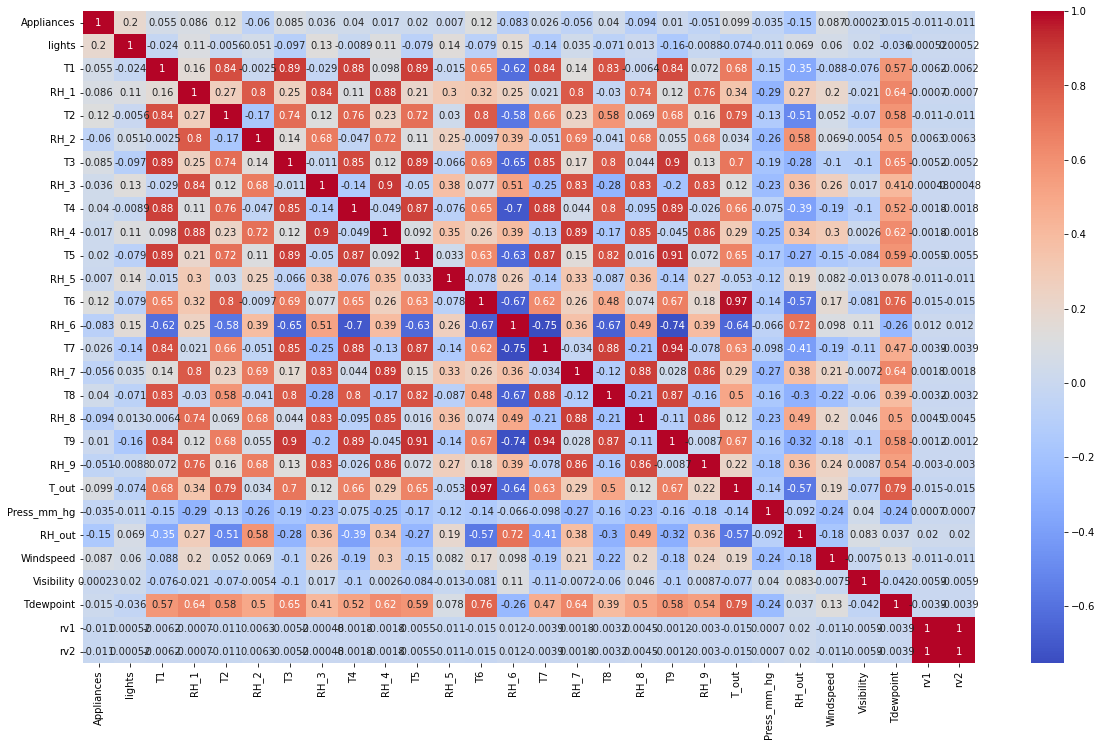

In [207]:
plt.figure(figsize=(20,12))
sb.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [208]:
df2=df.drop(['date','lights'], axis=1)

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [210]:
#features_df=df.drop(['date','lights','Appliances'], axis=1)
normalize_df=pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
appliances_target=normalize_df['Appliances']
features_df=normalize_df.drop('Appliances', axis=1)

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features_df,appliances_target,random_state=42, test_size=.3,shuffle=True)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [213]:
#fit model
linear_model=LinearRegression()

In [214]:
linear_model.fit(X_train[['T2']], X_train['T6'])
t6_predict=linear_model.predict(X_test[['T2']])
print(f'the r^2 score is: {round(r2_score(X_test.T6, t6_predict),2)}')

the r^2 score is: 0.64


In [215]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [216]:
#predict model
predict_value=linear_model.predict(X_test)
#predict_value

#calculate the mean_absolute_error


In [217]:
mae=mean_absolute_error(Y_test, predict_value)
print("Mean absolute error of the model is",round(mae, 3))#  when metric is zero it means the model is perfect  

Mean absolute error of the model is 0.05


In [218]:
#root mean square error
rmse= np.sqrt(mean_squared_error(Y_test,predict_value))
round(rmse,3)# the lower the rmse the better the model performance  

0.088

In [219]:
#residual sum of square
rss= np.sum(np.sqrt(Y_test-predict_value))
print (f'Residual sum of square {round(rss,2)}') 

Residual sum of square 392.88


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [220]:
r2_score=r2_score(Y_test,predict_value)
print('coefficient ofdetermination is', round(r2_score,2)) # the higher the metrics the better the model perform

coefficient ofdetermination is 0.15


In [221]:
# ridge penalization i.e regularization
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.4)
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.4)

In [222]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [223]:
# get function that compare the effect of regularization

def get_weight(model,feat, column_name):
    
    weights=pd.Series(model.coef_, feat.columns).sort_values() # return a series object
    weight_df=pd.DataFrame(weights).reset_index()
    weight_df.columns=['Features', column_name]
    weight_df[column_name].round(3)
    return weight_df


In [224]:
linear_model_weight=get_weight(linear_model, X_train, 'Linear_model_weight')
ridge_weight_df=get_weight(ridge_reg, X_train, 'Ridge_weight')
lasso_weight_df=get_weight(lasso_reg, X_train, 'Lasso_weight')

final_weights=pd.merge(linear_model_weight,ridge_weight_df, on='Features')
final_weights=pd.merge(final_weights,lasso_weight_df, on='Features')

In [225]:
final_weights.sort_values(by='Linear_model_weight', ascending=False)

,Features,Linear_model_weight,Ridge_weight,Lasso_weight
25,RH_1,0.553547,0.519525,0.017880
24,T3,0.290627,0.288087,0.000000
23,T6,0.236425,0.217292,0.000000
22,Tdewpoint,0.117758,0.083128,0.000000
21,T8,0.101995,0.101028,0.000000
20,RH_3,0.096048,0.095135,0.000000
19,RH_6,0.038049,0.035519,-0.000000
18,Windspeed,0.029183,0.030268,0.002912
17,T4,0.028981,0.027384,-0.000000
16,RH_4,0.026386,0.024579,0.000000


In [226]:
final_weights[final_weights['Lasso_weight']!=0]

,Features,Linear_model_weight,Ridge_weight,Lasso_weight
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
18,Windspeed,0.029183,0.030268,0.002912
25,RH_1,0.553547,0.519525,0.017880


In [227]:
reg_pred=ridge_reg.predict(X_test)
ls_pred=lasso_reg.predict(X_test)

In [228]:
print(f"The root mean square ridge reg is:{round (np.sqrt(mean_squared_error(Y_test,reg_pred)),3)}")

The root mean square ridge reg is:0.088


There is no change after training the ridge regression model with alpha value of 0.4

In [229]:
print(f"The root mean square of lasso reg is:{round (np.sqrt(mean_squared_error(Y_test,ls_pred)),3)}")

The root mean square of lasso reg is:0.094
